# **Análisis y Predicción de Ventas en una Tienda de Retail**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#Importar CSV
df = pd.read_csv('https://raw.githubusercontent.com/hypatiagarcia/retail-sales-analysis/refs/heads/main/data/retail_sales_dataset.csv')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Crear nuevas columnas

In [16]:
#Calcula el ingreso total por venta
df['Total ventas'] = df['Price per Unit'] * df['Quantity']

#clasificar la edad en rangos

def edad(i):
  if i >= 60:
    return 'Adulto Mayor'
  elif i <= 24:
    return 'Joven'
  else:
    return 'Adulto'

df['Categoria Edad'] = df['Age'].apply(edad)

df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total ventas,Categoria Edad
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Adulto
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Adulto
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Adulto
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Adulto
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Adulto
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,Adulto Mayor
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,Adulto
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,Joven
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Adulto


Clasifica los datos

In [17]:
#Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’)
bajo = df['Total Amount'].quantile(0.33)
alto =  df['Total Amount'].quantile(0.66)

def ventas(i):
  if i >= alto:
    return 'Alto'
  elif i <= bajo:
    return 'Bajo'
  else:
    return 'Medio'

df['Categoria Ventas'] = df['Total Amount'].apply(ventas)

df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total ventas,Categoria Edad,Categoria Ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Adulto,Medio
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Adulto,Alto
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Adulto,Bajo
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Adulto,Alto
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Adulto,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,Adulto Mayor,Bajo
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,Adulto,Bajo
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,Joven,Medio
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Adulto,Medio


Agrupación y Agregación

In [18]:
#Precio Promedio por Género y Producto
precio_genero = df.groupby('Gender')['Total Amount'].sum()

precio_genero

,Total Amount
Gender,
Female,232840
Male,223160


In [19]:
#Total de Ventas por Producto y Rango de Edad
precio_edad = df.groupby('Categoria Edad')['Total Amount'].sum().reset_index()

precio_edad


,Categoria Edad,Total Amount
0,Adulto,336535
1,Adulto Mayor,44815
2,Joven,74650


In [20]:
#Mínimo y Máximo Precio por Categoría de Producto:

minymax_producto = df.groupby('Product Category').agg(
    Maximo_Precio=('Price per Unit', 'max'),
    Minimo_Precio=('Price per Unit', 'min')
).reset_index()

minymax_producto

,Product Category,Maximo_Precio,Minimo_Precio
0,Beauty,500,25
1,Clothing,500,25
2,Electronics,500,25


Análisis Personalizado con apply

In [21]:
#Calcula la desviación de cada venta respecto a la media de su grupo.
media_ventas = df.groupby('Product Category')['Total Amount'].mean().reset_index()
media_ventas.columns = ['Product Category', 'Media_Ventas']

df = df.merge(media_ventas, on='Product Category')

df['Desviacion'] = df['Total Amount'] - df['Media_Ventas']

columnas_interes = df[['Product Category', 'Total Amount', 'Desviacion']]

print(columnas_interes)

    Product Category  Total Amount  Desviacion
0             Beauty           150 -317.475570
1           Clothing          1000  556.752137
2        Electronics            30 -428.786550
3           Clothing           500   56.752137
4             Beauty           100 -367.475570
..               ...           ...         ...
995         Clothing            50 -393.247863
996           Beauty            90 -377.475570
997           Beauty           100 -367.475570
998      Electronics           150 -308.786550
999      Electronics           120 -338.786550

[1000 rows x 3 columns]


# **Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización**

**Análisis Descriptivo y Visualización:**

In [22]:
#Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Total ventas,Media_Ventas,Desviacion
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,41.39200,2.514000,179.890000,456.000000,456.000000,456.000000,3.637979e-14
std,288.819436,13.68143,1.132734,189.681356,559.997632,559.997632,10.013133,5.599081e+02
min,1.000000,18.00000,1.000000,25.000000,25.000000,25.000000,443.247863,-4.424756e+02
25%,250.750000,29.00000,1.000000,30.000000,60.000000,60.000000,443.247863,-3.924756e+02
50%,500.500000,42.00000,3.000000,50.000000,135.000000,135.000000,458.786550,-3.203617e+02
75%,750.250000,53.00000,4.000000,300.000000,900.000000,900.000000,467.475570,4.325244e+02
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2000.000000,467.475570,1.556752e+03


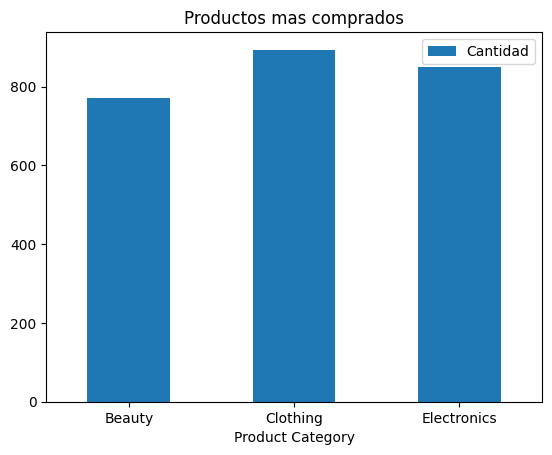

In [23]:
#Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
productos = df.groupby('Product Category')['Quantity'].sum().reset_index()

productos.plot(kind='bar', x='Product Category', y='Quantity')
plt.title('Productos mas comprados')
plt.xticks(rotation=0)
plt.legend(['Cantidad'])

plt.show()

Text(0, 0.5, 'Total ventas')

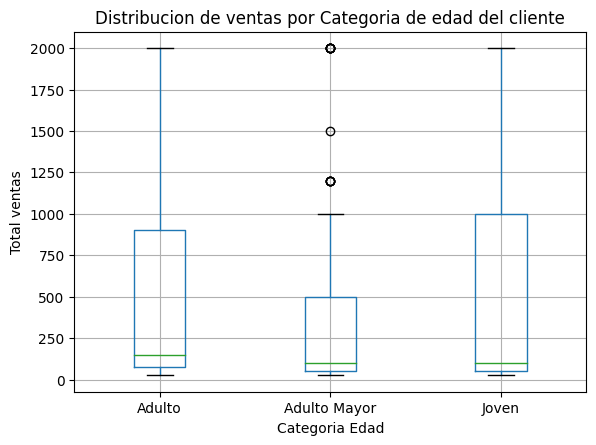

In [24]:
edad = df[['Categoria Edad', 'Total ventas']]

edad.boxplot(column='Total ventas', by='Categoria Edad')
plt.title('Distribucion de ventas por Categoria de edad del cliente')
plt.suptitle('')
plt.xlabel('Categoria Edad')
plt.ylabel('Total ventas')

Text(0.5, 0, 'Fechas')

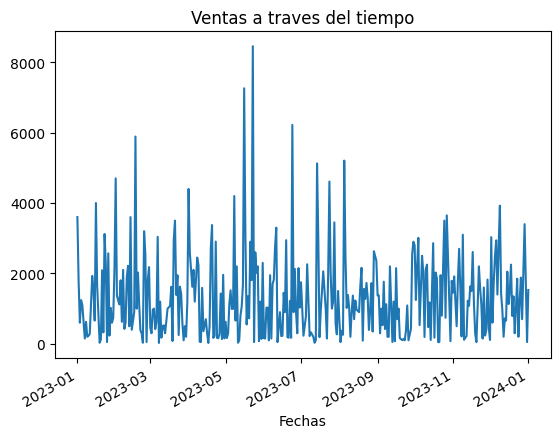

In [25]:
#Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
df['Date'] = pd.to_datetime(df['Date'])
fechas = df.groupby('Date')['Total Amount'].sum()

fechas.plot(x='Date', y='Total Amount')
plt.title('Ventas a traves del tiempo')
plt.xlabel('Fechas')

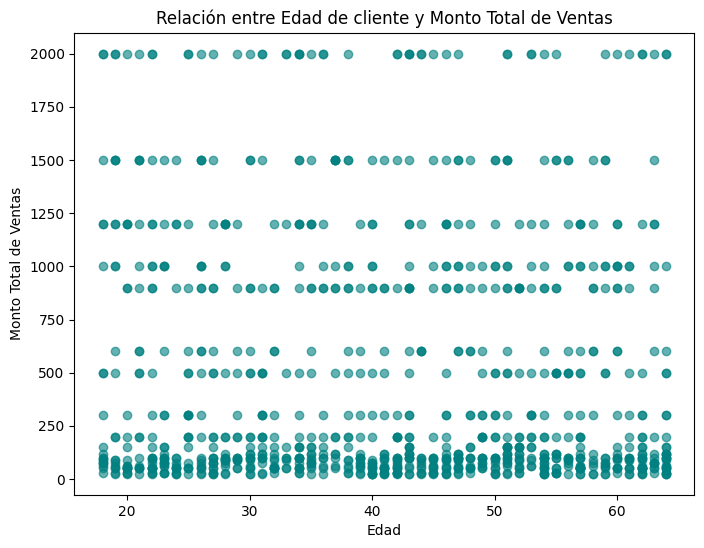

In [33]:
#Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total Amount'], color='teal', alpha=0.6)
plt.title('Relación entre Edad de cliente y Monto Total de Ventas')
plt.xlabel('Edad')
plt.ylabel('Monto Total de Ventas')

plt.show()

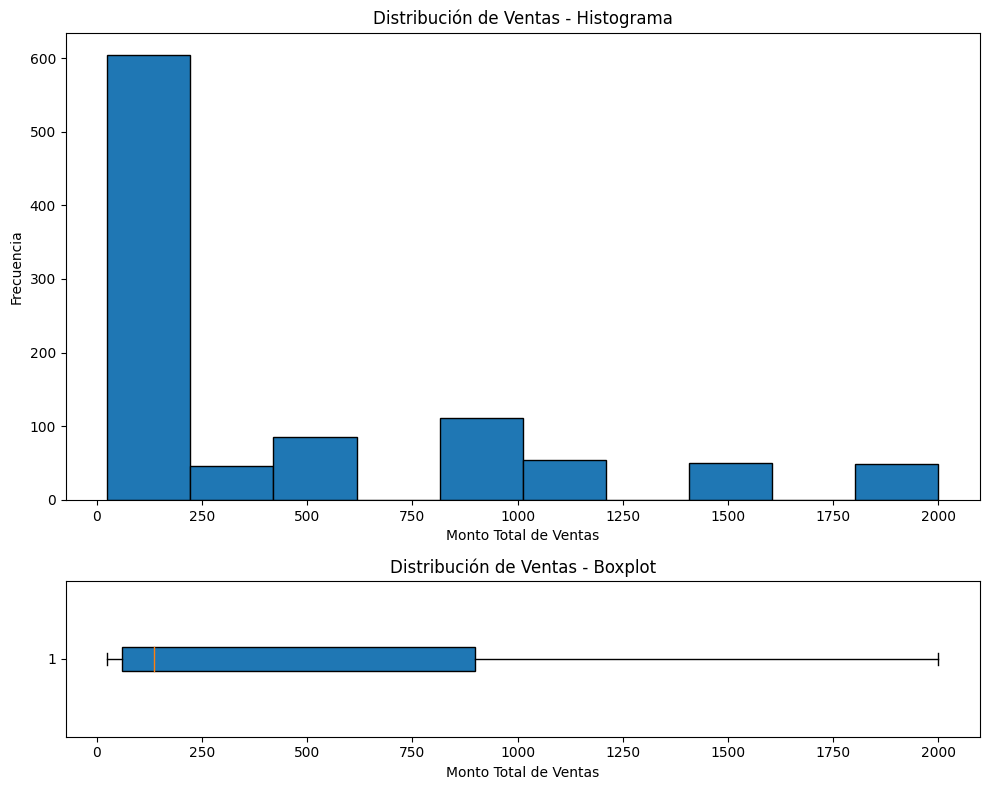

In [42]:
#Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

ax1.hist(df['Total Amount'], edgecolor='black')
ax1.set_title('Distribución de Ventas - Histograma')
ax1.set_xlabel('Monto Total de Ventas')
ax1.set_ylabel('Frecuencia')

ax2.boxplot(df['Total Amount'], vert=False, patch_artist=True, boxprops=dict(color='black'))
ax2.set_title('Distribución de Ventas - Boxplot')
ax2.set_xlabel('Monto Total de Ventas')

plt.tight_layout()
plt.show()
